<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Estudiar los missings en la variable uds venta
+ Discernir ceros (no venta) de verdaderos missings (datos faltantes)
    
    
<strong>Conclusions:</strong>
+ Hay datos faltantes correspondientes a los días 23, 24, 25 y 26
+ El resto no nos queda otra que considerarlos venta 0.

   
</div>

In [ ]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [2]:
import pandas as pd

In [72]:
# PRINT EDA FOR STOCK DATA
df = pd.read_csv("data/clean/stock_all.csv")

variable = "udsventa"

In [73]:
def filter_festivos(indf, only):
    df = indf.copy()
    if only:
        df = df.loc[(df.festivo == 1) | (df.weekday == 6)]
    else: 
        df = df.loc[(df.festivo != 1) & (df.weekday != 6)]
    return df
def perc(df1, df2):
    return round(100* df1.shape[0]/df2.shape[0])

In [82]:
# Declarar todos los df de estudio:

# ventas_byprod
ventas_byprod = pd.read_csv("data/clean/ventas_byprod.csv")


# df con registros con valores, con 0s y missings
exist = df.loc[~df[variable].isna()]
miss = df.loc[df[variable].isna()]
zeros = df.loc[df[variable] == 0]

# Missings sin contar las vacaciones
miss_noholiday = filter_festivos(miss, False)

# Missings por producto
byprod = miss_noholiday.groupby("producto")['fecha'].count().reset_index().sort_values("fecha", ascending=False)
byprod.columns = ["producto", "num_missings"]

# Missings por fecha
bydate = miss_noholiday.groupby("fecha")['producto'].count().reset_index().sort_values("producto", ascending=False)
bydate.columns = ["fecha", "num_missings"]

# Missings por dia de la semana
byday = miss.groupby("weekday")['producto'].count().reset_index().sort_values("producto", ascending=False)
byday.columns = ["weekday", "num_missings"]

# Analisis previo

In [83]:
print("Registros totales en dataset: {} ".format(df.shape[0]))
print("Productos totales: {} ".format(len(df.producto.unique())))
print("Días totales: {} ".format(len(df.fecha.unique())))
print("Dias totales de vacaciones: {} ".format(len(filter_festivos(df, True).fecha.unique())))

Registros totales en dataset: 24272 
Productos totales: 82 
Días totales: 296 
Dias totales de vacaciones: 50 


# Datos existentes en dias de vacaciones (festivos y domingos)

In [84]:
print("  Valores existentes en dias de vacaciones: {}"\
                .format(filter_festivos(exist, True).shape[0]))

print("  Dias existentes de vacaciones con datos: {}"\
                .format(len(filter_festivos(exist, True).fecha.unique())))

filter_festivos(exist, True).fecha.unique()

  Valores existentes en dias de vacaciones: 270
  Dias existentes de vacaciones con datos: 7


array(['2019-06-30', '2019-10-13', '2019-11-01', '2019-12-06',
       '2019-12-09', '2020-01-01', '2020-01-05'], dtype=object)

In [85]:
print("Dias festivos con datos:")
filter_festivos(exist, True).groupby("fecha")['producto'].count()

Dias festivos con datos:


fecha
2019-06-30    28
2019-10-13    28
2019-11-01    69
2019-12-06    48
2019-12-09    71
2020-01-01     7
2020-01-05    19
Name: producto, dtype: int64

¿Porqué tienen datos estos festivos?

# Datos perdidos en el total y sin contar las vacaciones

In [94]:
print("  Valores missings in udsventa:                                                              {} ({}%)"\
                .format(miss.shape[0], perc(miss, df)))

print("  Valores con ceros in udsventa:                                                             {} ({}%)"\
                .format(zeros.shape[0], perc(zeros, df)))

print("  Valores missings in udsventa sin domingos y festivos:                                      {} ({}%)"\
                .format(miss_noholiday.shape[0], perc(miss_noholiday, df)))

print("  Valores missings in udsventa sin domingos y festivos y con datos anteriores al 2020-03-23: {} ({}%)"\
                .format(miss_noholiday.loc[miss_noholiday.fecha < '2020-03-23'].shape[0], perc(miss_noholiday, df)))

  Valores missings in udsventa:                                                              7243 (30%)
  Valores con ceros in udsventa:                                                             131 (1%)
  Valores missings in udsventa sin domingos y festivos:                                      3413 (14%)
  Valores missings in udsventa sin domingos y festivos y con datos anteriores al 2020-03-23: 3085 (14%)


In [81]:
zeros

,fecha,producto,udsstock,udsventa,udsprevisionempresa,promo,festivo,weekday
324,2019-06-08,96,NaN,0.0,251.0,1.0,0.0,5
9242,2019-09-25,71,135.0,0.0,464.0,0.0,0.0,2
9261,2019-09-25,95,26.0,0.0,545.0,0.0,0.0,2
9324,2019-09-26,71,135.0,0.0,226.0,0.0,0.0,3
9406,2019-09-27,71,135.0,0.0,226.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...
22487,2020-03-05,29,NaN,0.0,0.0,0.0,0.0,3
22815,2020-03-09,29,NaN,0.0,0.0,0.0,0.0,0
22897,2020-03-10,29,NaN,0.0,0.0,0.0,0.0,1
23471,2020-03-17,29,NaN,0.0,0.0,0.0,0.0,1


# Datos perdidos por producto

In [91]:
print("   Missings en udsventa sin domingos y festivos para {} productos de {} totales."\
                .format(byprod.loc[byprod.num_missings != 0].shape[0], byprod.shape[0]))
print("   5 productos con más missings:")
byprod.head()

   Missings en udsventa sin domingos y festivos para 82 productos de 82 totales.
   5 productos con más missings:


,producto,num_missings
58,70,242
5,7,232
35,44,173
77,95,167
44,54,156


In [92]:
list(ventas_byprod.loc[ventas_byprod.fecha_ultima_venta < '2020-01-01', ['producto', 'fecha_primera_venta', 'fecha_ultima_venta']]\
.sort_values("fecha_ultima_venta").producto)

[7, 44, 82, 54, 71, 76]

In [42]:
ventas_byprod.loc[ventas_byprod.fecha_ultima_venta < '2020-01-01', ['producto', 'fecha_primera_venta', 'fecha_ultima_venta']].sort_values("fecha_ultima_venta")

,producto,fecha_primera_venta,fecha_ultima_venta,freq_venta
58,7,2015-06-29,2019-06-21,1133
34,44,2015-06-29,2019-09-13,1226
44,54,2015-06-29,2019-10-02,1156
60,71,2015-06-29,2019-10-03,1165
65,76,2016-11-02,2019-10-16,888
71,82,2015-06-29,2019-11-29,1187
25,34,2015-06-30,2019-12-17,927


# Datos perdidos por fecha

In [53]:
print("   Missings en udsventa sin domingos y festivos para {} fechas de {} totales."\
                .format(bydate.loc[bydate.num_missings != 0].shape[0], bydate.shape[0]))
print("Dias sin ningun dato (de los no festivos):")
bydate.loc[bydate.num_missings == 82].sort_values("fecha")

   Missings en udsventa sin domingos y festivos para 246 fechas de 246 totales.
Dias sin ningun dato (de los no festivos):


,fecha,num_missings
48,2019-07-31,82
49,2019-08-01,82
50,2019-08-02,82
51,2019-08-03,82
70,2019-08-27,82
242,2020-03-23,82
243,2020-03-24,82
244,2020-03-25,82
245,2020-03-26,82


#### Los missings del 23 al 26 de marzo de 2020 son missings reales, los de verano es posible que no haya ventas.

In [57]:
print("   5 fechas con más missings (sin que sean todos):")
bydate.loc[bydate.num_missings != 82].head()

   5 fechas con más missings (sin que sean todos):


,fecha,num_missings
69,2019-08-26,78
115,2019-10-19,50
52,2019-08-05,40
71,2019-08-28,40
217,2020-02-22,31


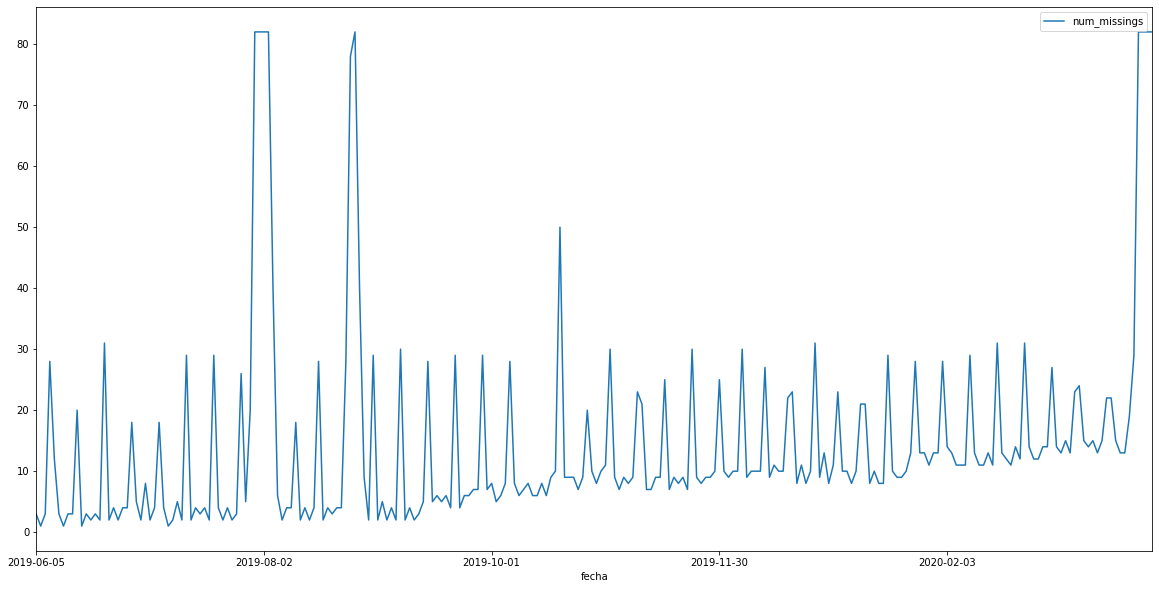

In [61]:
bydate.sort_values("fecha").set_index("fecha").plot(figsize=(20,10))

# Missings por dia de la semana (contando festivos)

In [69]:
byday.sort_values("weekday")

,weekday,num_missings
0,0,616
1,1,491
2,2,636
3,3,559
4,4,457
5,5,1246
6,6,3369
